In [1]:
import numpy
import pandas
import matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#функция вейвлет преобразования Морле
def morley(x):
    m = real(exp(-x**2/2)*exp(1j*2*pi*x))
    return m

In [3]:
data = loadtxt('AVD08dayli_Tomso.DAT') # файл содержащий значения foF2, за день 
N = len(data) # количество дней 
Ni = int(N/2)
t = arange(0,N) # количество дней
a = arange(1, Ni) # параметр 
b = arange(0, N) # параметр 

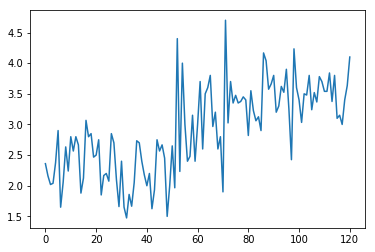

In [4]:
foF2av = mean(data[:,1]) # среднее значение foF2 за данный промежуток 
foF2 = data[:,1]
#foF2 = data[:,1]
#for i in range(0,N-1):
   # foF2[i+1] = data[i+1,1] -data[i,1]
plot(foF2)

In [5]:
# Вейвлет преобразование Морле
Np = 30
WA = np.zeros(Np*N).reshape(Np,N)
for i in range(1,Np):
    for j in range(0,N):
        sum = 0
        for e in range(0,N):
            sum = sum + (foF2[e] - foF2av)*morley((t[e]-b[j])/a[i])
        WA[i,j] = sum/sqrt(a[i])

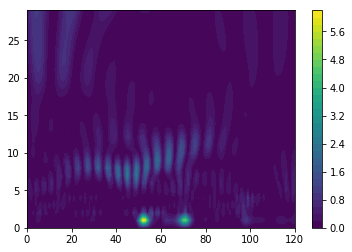

In [6]:
contourf((WA)**2, 35)
colorbar()

In [7]:
W = (WA)**2
Ew = np.zeros(N*2).reshape(N,2)
for j in range(1,N):
    sum = 0
    for i in range(27, 30):
        sum = sum + W[i,j]
        Ew[j,0] = j
        Ew[j,1] = sum
savetxt('Energy_2008_Tomso(27-30).dat', Ew)

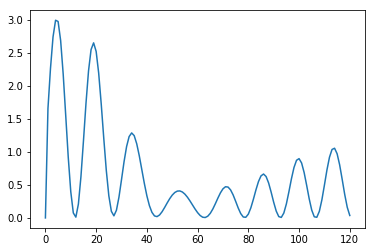

In [8]:
plot(Ew[:,0], Ew[:,1])